# Michaelis menten analysis

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Load our data

In [4]:
data = pd.read_csv("data.csv")
data

,sample,rate,substrate
0,i300n,6.700000e+02,0.07500
1,i300n,5.360000e+02,0.01875
2,i300n,3.340000e+02,0.00469
3,i300n,1.430000e+02,0.00117
4,i300n,4.390000e+01,0.00029
5,i300n,1.120000e+01,0.00007
6,i300n,2.830000e+00,0.00002
7,i300n,-1.100000e-13,0.00000
8,i300n,6.840000e+02,0.07500
9,i300n,5.280000e+02,0.01875


## Plot the data

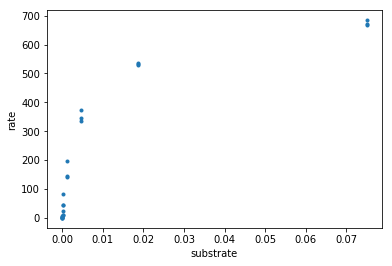

In [7]:
v = data["rate"]
s = data["substrate"]
plt.plot(s, v, '.')
plt.xlabel("substrate")
plt.ylabel("rate")

## Fitting the data
This is the model we're fitting:

$$
v = \frac{V_{max} \cdot [S]}{[S] + K_{M}}  
$$

In [9]:
import scipy.optimize

In [8]:
def func(s, Vmax, Km):
    return (Vmax * s) / (s + Km)

In [19]:
def fitter(Vmax, Km):
    fitparams, fiterr = scipy.optimize.curve_fit(func, s, v, p0=[Vmax, Km])

    xmodel = np.linspace(0, .1, 1000)
    ymodel = func(xmodel, *fitparams)


    plt.plot(s, v, '.')
    plt.plot(xmodel, ymodel, 'r')
    plt.xlabel("substrate")
    plt.ylabel("rate")
    plt.show()
    return fitparams

# Fitting widget to make life easy

In [20]:
import ipywidgets

In [21]:
widget = ipywidgets.interactive(fitter, Vmax=(-10,10), Km=(-10,10))
widget